# Texte 2012-B2 : Systèmes dynamiques hamiltoniens

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 5)

## Pendule linéarisé
$$\theta''+\theta=0$$

In [2]:
dt = 0.05
T  = 50
y0 = np.array([1.,0.])

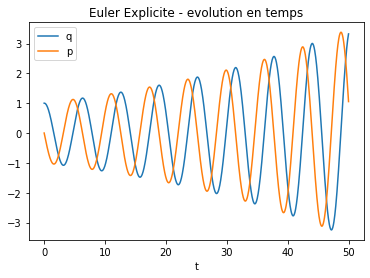

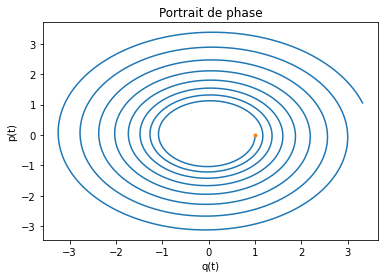

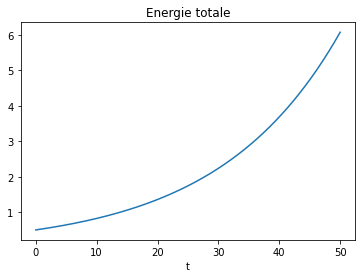

In [3]:
# Résolution par la méthode d'Euler explicite
t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]

while t+dt<T:
    t = t + dt
    q, p = q+dt*p, p-dt*q
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("Euler Explicite - evolution en temps")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*(y[0]**2+y[1]**2) for y in List_y])
plt.title("Energie totale")
plt.xlabel('t')
plt.show()

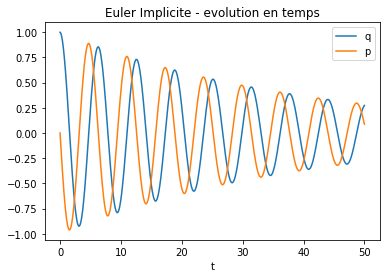

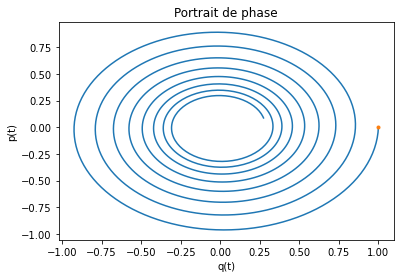

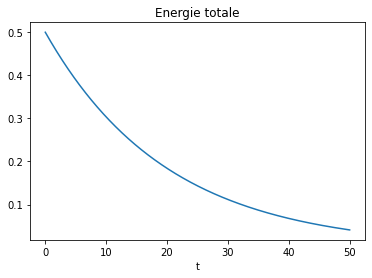

In [4]:
# Résolution par la méthode d'Euler implicite
t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]
    
while t+dt<T:
    t = t + dt
    q, p = 1/(1+dt**2)*(q+dt*p), 1/(1+dt**2)*(p-dt*q)
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("Euler Implicite - evolution en temps")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*(y[0]**2+y[1]**2) for y in List_y])
plt.title("Energie totale")
plt.xlabel('t')
plt.show()

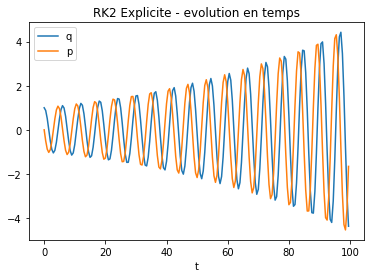

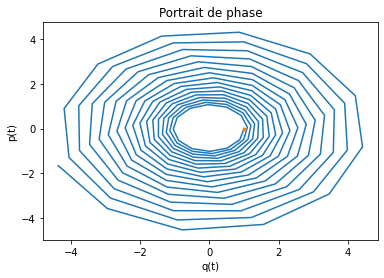

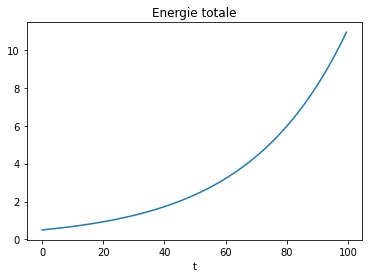

In [5]:
# Résolution par la méthode de Runge-Kutta 2 (prédicteur-correcteur)
# Le pas de temps est significativement plus grand que les expériences
# précédentes pour pouvoir manifester la croissance de l'energie.

dt = 0.5
T = 100
t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]

while t+dt<T:
    t = t + dt
    qt, pt = q+dt/2*p, p-dt/2*q
    q, p = q+dt*pt, p-dt*qt
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("RK2 Explicite - evolution en temps")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*(y[0]**2+y[1]**2) for y in List_y])
plt.title("Energie totale")
plt.xlabel('t')
plt.show()

# Pendule non-linéaire
$$\theta''+\sin(\theta)=0$$

In [6]:
dt = 0.05
T = 60
y0 = np.array([1.,0.])

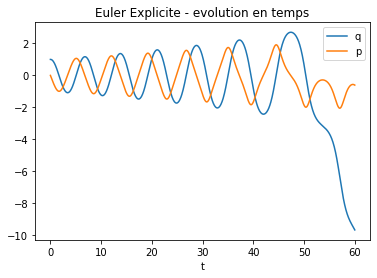

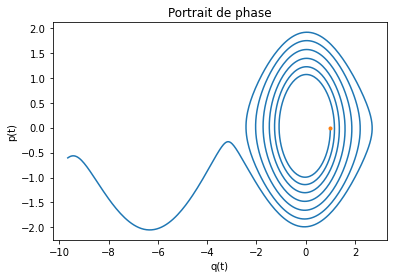

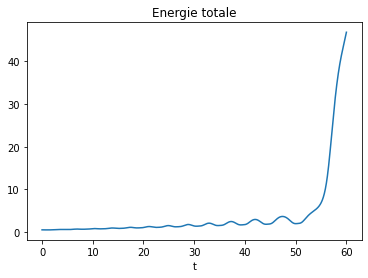

In [7]:
# Résolution par la méthode d'Euler explicite
t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]

while t+dt<T:
    t = t + dt
    q, p = q+dt*p, p-dt*sin(q)
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("Euler Explicite - evolution en temps")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*(y[0]**2+y[1]**2) for y in List_y])
plt.title("Energie totale")
plt.xlabel('t')

plt.show()

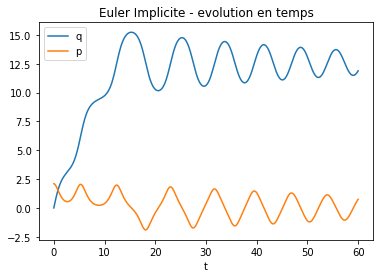

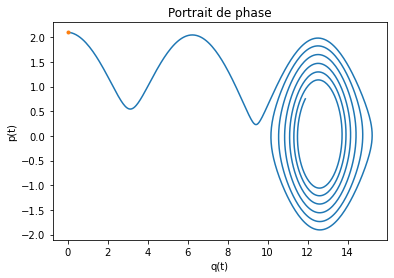

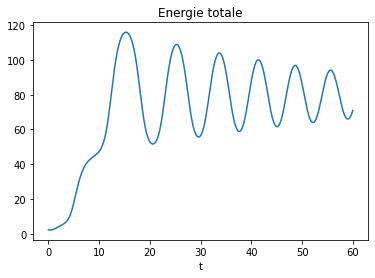

In [8]:
y0 = np.array([0,2.1])

from scipy.optimize import root

# Résolution par la méthode d'Euler implicite
# utilisant une fonctionnalité de résolution d'equation scalaire par scipy.optimize.root

t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]

while t+dt<T:
    t = t + dt
    def eqimp(Y):
        return np.array([Y[0]-q-dt*Y[1],Y[1]-p+dt*sin(Y[0])])
    Y = root(eqimp, [q,p])
    q, p = Y.x[0], Y.x[1]
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("Euler Implicite - evolution en temps")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*(y[0]**2+y[1]**2) for y in List_y])
plt.title("Energie totale")
plt.xlabel('t')
plt.show()

## Euler symplectique

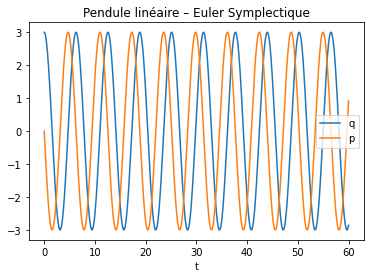

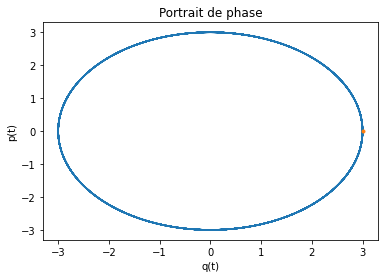

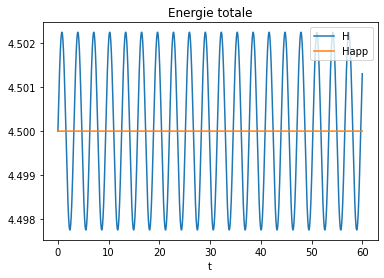

In [12]:
# Résolution par la méthode d'Euler symplectique 

y0 = np.array([3.,0.])
dt = 0.001

t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]
    
while t+dt<T:
    t = t + dt
    q = q+dt*p
    p = p-dt*q
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("Pendule linéaire – Euler Symplectique")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*(y[0]**2+y[1]**2) for y in List_y], label="H")
plt.plot(List_t,[0.5*(y[0]**2+y[1]**2)+0.5*dt*y[0]*y[1] for y in List_y], label="Happ")
plt.title("Energie totale")
plt.xlabel('t')
plt.legend()
plt.show()

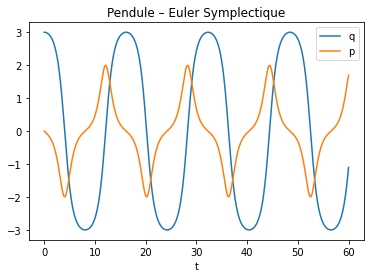

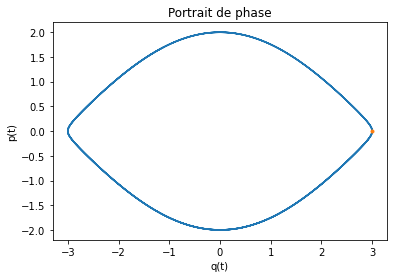

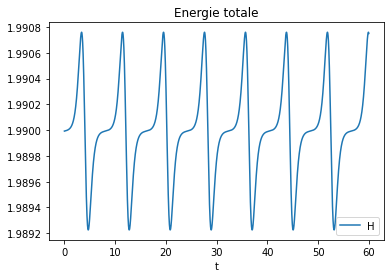

In [13]:
y0 = np.array([3.,0.])
dt = 0.001

t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]
    
while t+dt<T:
    t = t + dt
    q = q+dt*p
    p = p-dt*sin(q)
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("Pendule – Euler Symplectique")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*y[1]**2+1-cos(y[0]) for y in List_y], label="H")
plt.title("Energie totale")
plt.xlabel('t')
plt.legend()
plt.show()

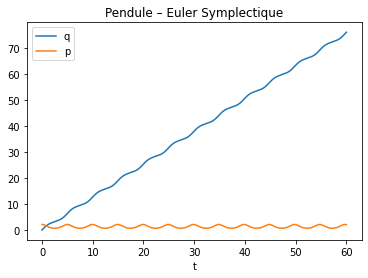

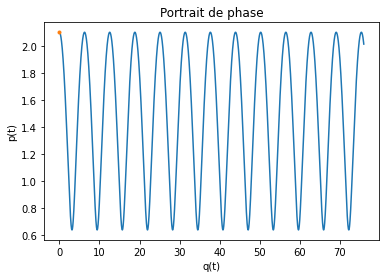

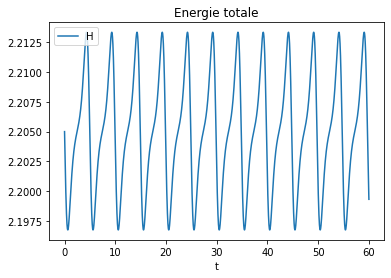

In [14]:
y0 = np.array([0.,2.1])
dt = 0.01

t = 0.
y = y0
List_t = [t]
List_y = [y]
q, p = y[0], y[1]
    
while t+dt<T:
    t = t + dt
    q = q+dt*p
    p = p-dt*sin(q)
    List_t.append(t)
    List_y.append([q,p])

plt.plot(List_t,[y[0] for y in List_y], label="q")
plt.plot(List_t,[y[1] for y in List_y], label="p")
plt.title("Pendule – Euler Symplectique")
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot([y[0] for y in List_y],[y[1] for y in List_y])
plt.plot(y0[0],y0[1],'.')
plt.title("Portrait de phase")
plt.xlabel('q(t)'),plt.ylabel('p(t)')
plt.show()

plt.plot(List_t,[0.5*y[1]**2+1-cos(y[0]) for y in List_y], label="H")
plt.title("Energie totale")
plt.xlabel('t')
plt.legend()
plt.show()